In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime as dt
import os
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from os import path

In [6]:
lib_func_fol = '/Users/amrozeidan/Downloads/tappy-master'

sys.path.append(path.join(lib_func_fol , 'tappy' ))
sys.path.append(path.join(lib_func_fol ,'tappy' , 'tappy_lib' ))
import tappy

In [8]:
tappy

<module 'tappy' from '/Users/amrozeidan/Downloads/tappy-master/tappy/tappy.py'>

In [10]:
#help(tappy)

In [11]:
def datenumaz(d):
    return 366 + d.toordinal() + (d - dt.fromordinal(d.toordinal())).total_seconds()/(24*60*60)

In [12]:
wl = '/Users/amrozeidan/Desktop/EasyGSH/res2305_zeitrio/telemac_variables/free_surface/Europlatform.dat'

dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

data = pd.read_csv(wl , header =0 , parse_dates = ['TimeStep_No'], 
                         date_parser = dateparse, index_col =0 , squeeze=True)

dates = data.index.tolist()
date_num = list(map(datenumaz,data.index.tolist()))
elevations =  data.to_numpy() 

In [13]:
#data

In [14]:
#dates

In [15]:
#date_num

In [16]:
#elevations

Text(0, 0.5, 'Surface elevation (m)')

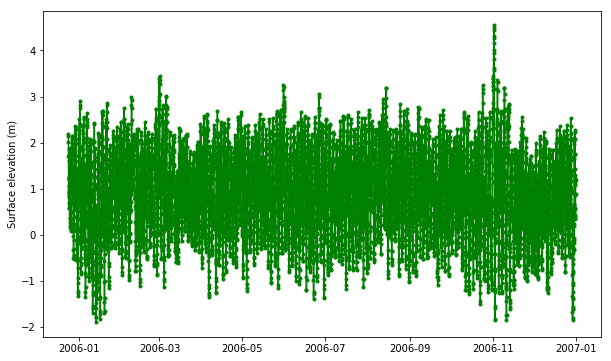

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot_date(dates, elevations, 'g.-')
ax.set_ylabel('Surface elevation (m)')

In [19]:
# Set up the bits needed for TAPPY. This is mostly lifted from
# tappy.py in the baker function "analysis" (around line 1721).
quiet = True
debug = False
outputts = False
outputxml = False
ephemeris = False
rayleigh = 1
print_vau_table = False
missing_data = 'ignore'
linear_trend = False
remove_extreme = False
zero_ts = None
filter = None
pad_filters = None
include_inferred = True
if rayleigh:
    ray = float(rayleigh)

# Make the TAPPY object with the relevant configuration.
x = tappy.tappy(outputts=outputts,
                outputxml=outputxml,
                quiet=quiet,
                debug=debug,
                ephemeris=ephemeris,
                rayleigh=rayleigh,
                print_vau_table=print_vau_table,
                missing_data=missing_data,
                linear_trend=linear_trend,
                remove_extreme=remove_extreme,
                zero_ts=zero_ts,
                filter=filter,
                pad_filters=pad_filters,
                include_inferred=include_inferred)

In [20]:
# Populate the TAPPY object with the data we loaded.
x.dates = dates
x.elevation = elevations
package = x.astronomic(x.dates)
(x.zeta, x.nu, x.nup, x.nupp, x.kap_p, x.ii, x.R, x.Q, x.T, x.jd, x.s, x.h, x.N, x.p, x.p1) = package
(x.speed_dict, x.key_list) = x.which_constituents(len(x.dates), package, rayleigh_comp=ray)

In [21]:
# Perform the analysis
x.constituents()

In [22]:
# Print the M2 phase and amplitude.
print('M2 phase:     {}'.format(x.phase['M2']))
print('M2 amplitude: {}'.format(x.r['M2']))

M2 phase:     83.75343769062692
M2 amplitude: 0.6486866131976518


In [35]:
#x.phase

In [36]:
#x.r

In [30]:
df_A = pd.DataFrame.from_dict(x.r , orient='index',columns=['Amplitude'])

In [31]:
df_g = pd.DataFrame.from_dict(x.phase , orient='index',columns=['phase'])

In [32]:
df_A_g = df_A.join(df_g , how='inner')

In [34]:
df_A_g

,Amplitude,phase
2MN6,0.009900,125.896801
2MS6,0.017618,202.081127
2N2,0.005543,184.683421
2Q1,0.010659,125.132430
2SM2,0.017015,79.150948
2SM6,0.005576,242.730373
J1,0.004272,212.716338
K1,0.056676,194.586644
K2,0.060509,131.393855
L2,0.091736,154.432639
